In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/South Eastern.csv'
df = pd.read_csv(file_path)
print(df)

                Unnamed: 0                       Unnamed: 1 Mar 2010  \
0  South Eastern Melbourne                          Berwick    1,204   
1                      NaN                       Cranbourne    1,170   
2                      NaN                        Dandenong    1,430   
3                      NaN  Dandenong North-Endeavour Hills    1,192   
4                      NaN        Narre Warren-Hampton Park    1,746   
5                      NaN                       Noble Park    1,145   
6                      NaN                         Pakenham    1,759   
7                      NaN                       Springvale    1,185   
8                      NaN                      Group Total   10,831   

  Unnamed: 83 Jun 2010 Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  \
0     $325.00    1,216     $330.00    1,261     $340.00    1,258     $340.00   
1     $280.00    1,240     $290.00    1,285     $295.00    1,403     $300.00   
2     $260.00    1,410     $270.00    1

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                            Suburb Median.1 Median.2 Median.3 Median.4  \
0                          Berwick  $325.00  $330.00  $340.00  $340.00   
1                       Cranbourne  $280.00  $290.00  $295.00  $300.00   
2                        Dandenong  $260.00  $270.00  $270.00  $275.00   
3  Dandenong North-Endeavour Hills  $280.00  $280.00  $290.00  $300.00   
4        Narre Warren-Hampton Park  $300.00  $300.00  $310.00  $320.00   
5                       Noble Park  $275.00  $280.00  $287.00  $290.00   
6                         Pakenham  $280.00  $285.00  $290.00  $300.00   
7                       Springvale  $300.00  $300.00  $300.00  $300.00   
8                      Group Total  $285.00  $290.00  $300.00  $300.00   

  Median.5 Median.6 Median.7 Median.8 Median.9  ... Median.32 Median.33  \
0  $350.00  $350.00  $350.00  $350.00  $350.00  ...   $390.00   $390.00   
1  $310.00  $315.00  $320.00  $320.00  $320.00  ...   $380.00   $380.00   
2  $280.00  $280.00  $280.00  $280

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                            Suburb  Median.1  Median.2  Median.3  Median.4  \
0                          Berwick     325.0     330.0     340.0     340.0   
1                       Cranbourne     280.0     290.0     295.0     300.0   
2                        Dandenong     260.0     270.0     270.0     275.0   
3  Dandenong North-Endeavour Hills     280.0     280.0     290.0     300.0   
4        Narre Warren-Hampton Park     300.0     300.0     310.0     320.0   
5                       Noble Park     275.0     280.0     287.0     290.0   
6                         Pakenham     280.0     285.0     290.0     300.0   
7                       Springvale     300.0     300.0     300.0     300.0   
8                      Group Total     285.0     290.0     300.0     300.0   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0     350.0     350.0     350.0     350.0     350.0  ...      390.0   
1     310.0     315.0     320.0     320.0     320.0  ...      380.0   
2     

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_72561/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                            Suburb  Median.1  Median.2  Median.3  Median.4  \
0                          Berwick       325       330       340       340   
1                       Cranbourne       280       290       295       300   
2                        Dandenong       260       270       270       275   
3  Dandenong North-Endeavour Hills       280       280       290       300   
4        Narre Warren-Hampton Park       300       300       310       320   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0       350       350       350       350       350  ...        390   
1       310       315       320       320       320  ...        380   
2       280       280       280       280       280  ...        335   
3       300       300       300       300       300  ...        350   
4       320       320       320       330       330  ...        370   

   Median.33  Median.34  Median.35  Median.36  Median.37  Medi

Growth trend for Berwick:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.538462  3.030303       0.0  2.941176       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...        0.0   2.564103        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0        0.0        0.0      -1.25        0.0        0.0  18.987342   

   Average Growth Rate (%)  
0                 0.968405  

[1 rows x 42 columns]


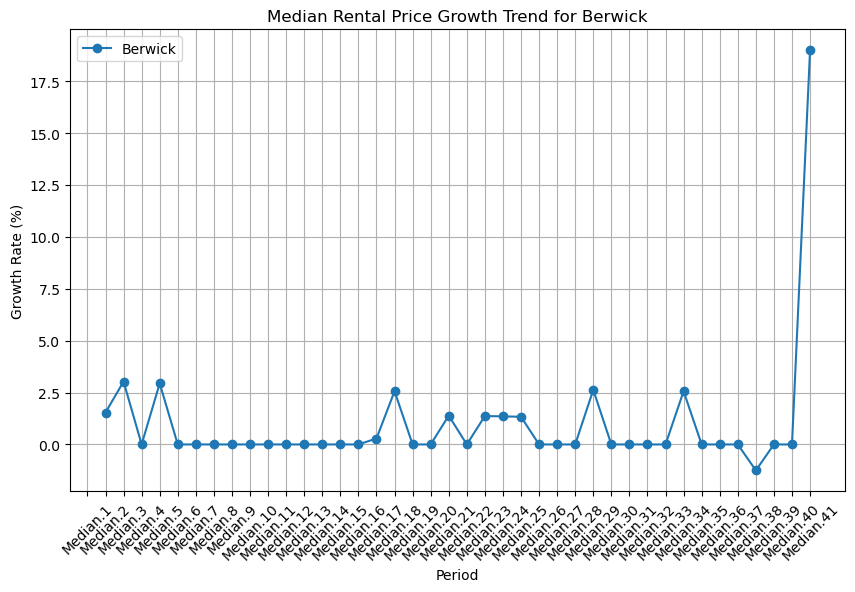

Growth trend for Cranbourne:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>  3.571429  1.724138  1.694915  3.333333  1.612903  1.587302   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1       0.0       0.0     1.5625  ...        0.0        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1        0.0   1.315789        0.0        0.0        0.0  19.480519   

   Average Growth Rate (%)  
1                 1.291265  

[1 rows x 42 columns]


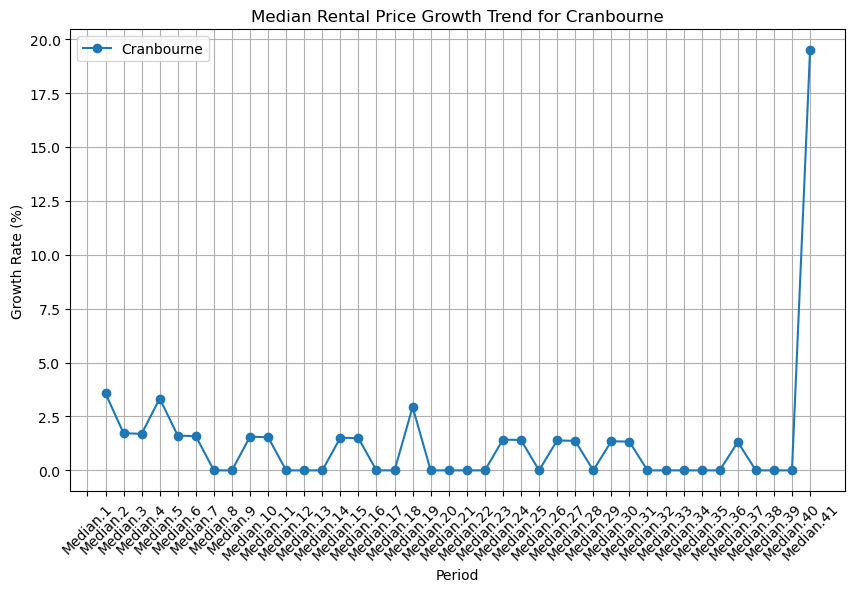

Growth trend for Dandenong:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  3.846154       0.0  1.851852  1.818182       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2       0.0       0.0   3.571429  ...   1.492537        0.0   1.764706   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2   1.156069        0.0        0.0        0.0        0.0   5.714286   

   Average Growth Rate (%)  
2                 0.897644  

[1 rows x 42 columns]


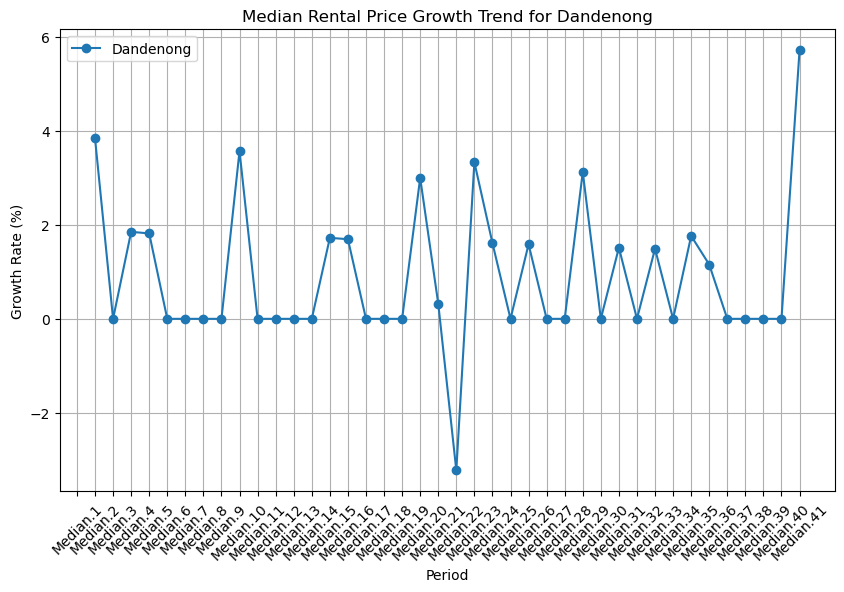

Growth trend for Dandenong North-Endeavour Hills:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>       0.0  3.571429  3.448276       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       0.0       0.0        0.0  ...        0.0        0.0   1.428571   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3        0.0        0.0   1.408451        0.0        0.0  11.111111   

   Average Growth Rate (%)  
3                 0.913358  

[1 rows x 42 columns]


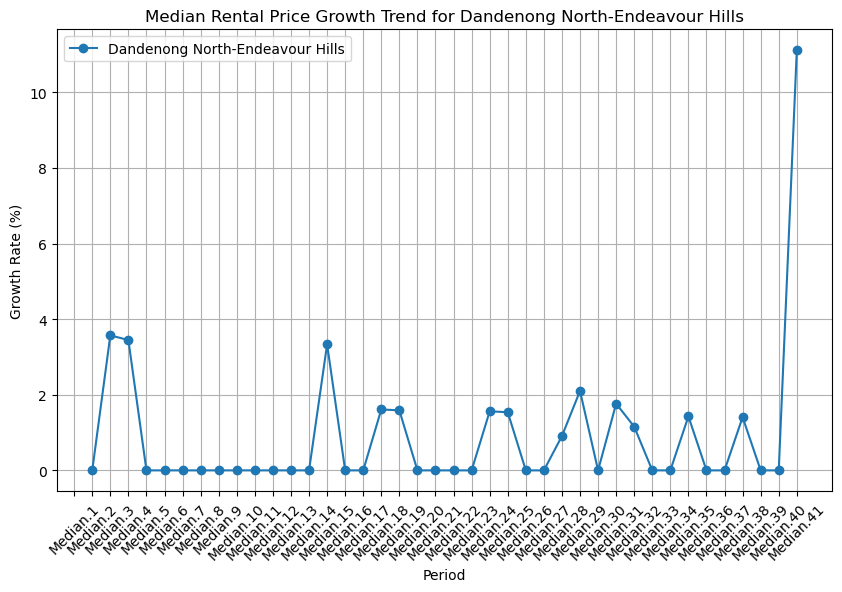

Growth trend for Narre Warren-Hampton Park:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>       0.0  3.333333  3.225806       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4     3.125       0.0        0.0  ...        0.0        0.0   1.351351   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.333333        0.0        0.0        0.0        0.0  15.789474   

   Average Growth Rate (%)  
4                 0.993082  

[1 rows x 42 columns]


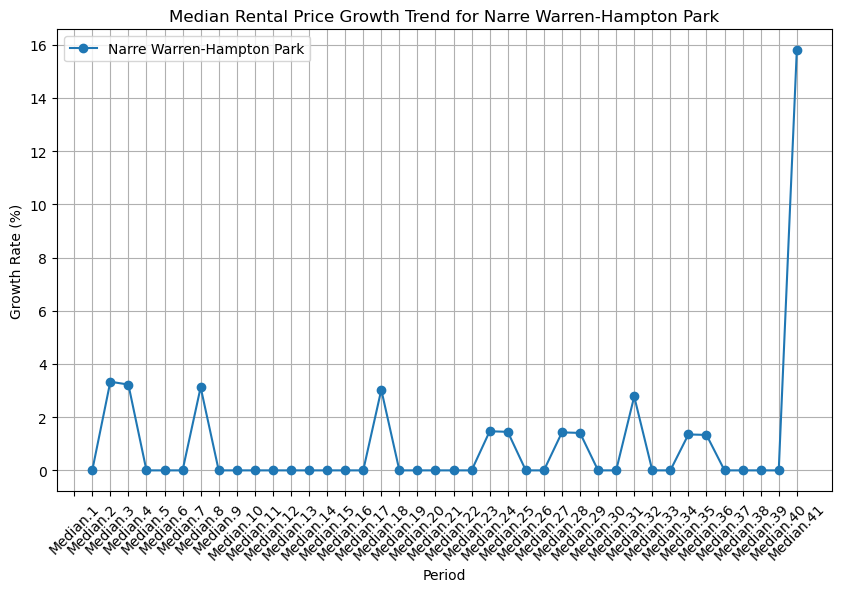

Growth trend for Noble Park:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>  1.818182       2.5  1.045296       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5  1.724138 -1.694915   1.724138  ...   1.470588   1.449275        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5        0.0        0.0        0.0   2.857143        0.0   6.944444   

   Average Growth Rate (%)  
5                 0.854852  

[1 rows x 42 columns]


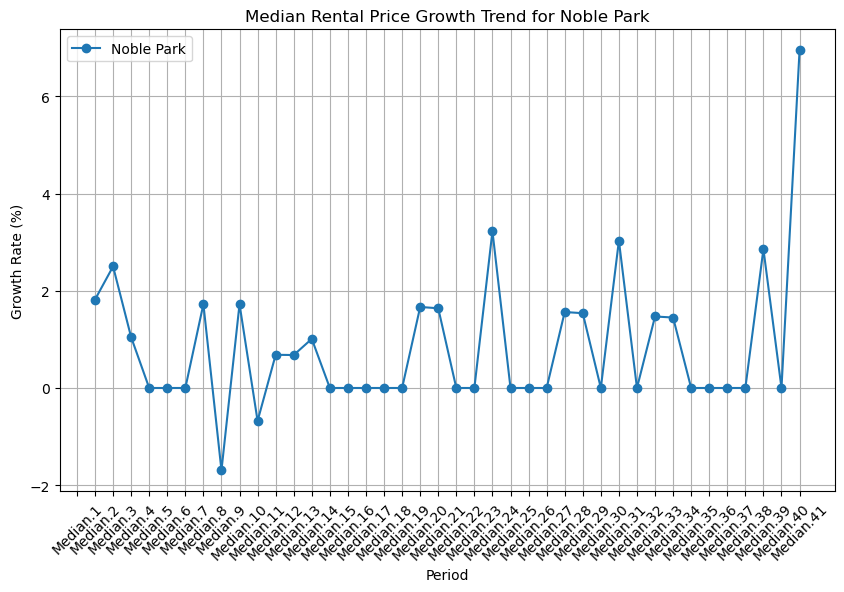

Growth trend for Pakenham:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>  1.785714  1.754386  3.448276       0.0       0.0  1.666667   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6  1.639344       0.0        0.0  ...        0.0        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0        0.0        0.0   1.428571        0.0  18.309859   

   Average Growth Rate (%)  
6                 1.059016  

[1 rows x 42 columns]


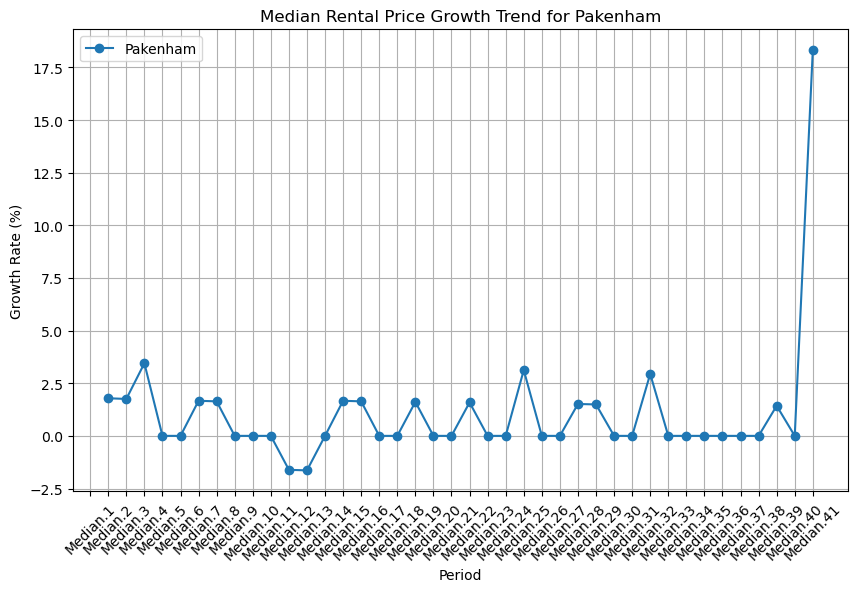

Growth trend for Springvale:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>       0.0       0.0       0.0       0.0  1.666667  1.639344   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7  3.225806       0.0        0.0  ...   1.333333        0.0        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7   1.315789   1.298701        0.0   1.282051   1.012658   7.769424   

   Average Growth Rate (%)  
7                 0.914131  

[1 rows x 42 columns]


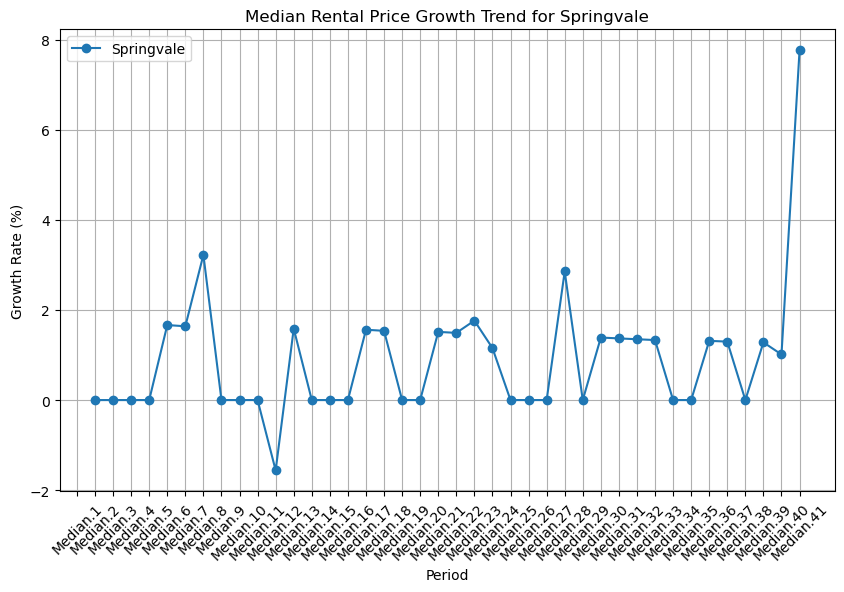

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>  1.754386  3.448276       0.0       0.0  3.333333       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8       0.0  1.612903        0.0  ...   1.388889   1.369863        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0   1.081081    0.26738   1.333333        0.0  13.157895   

   Average Growth Rate (%)  
8                 1.055402  

[1 rows x 42 columns]


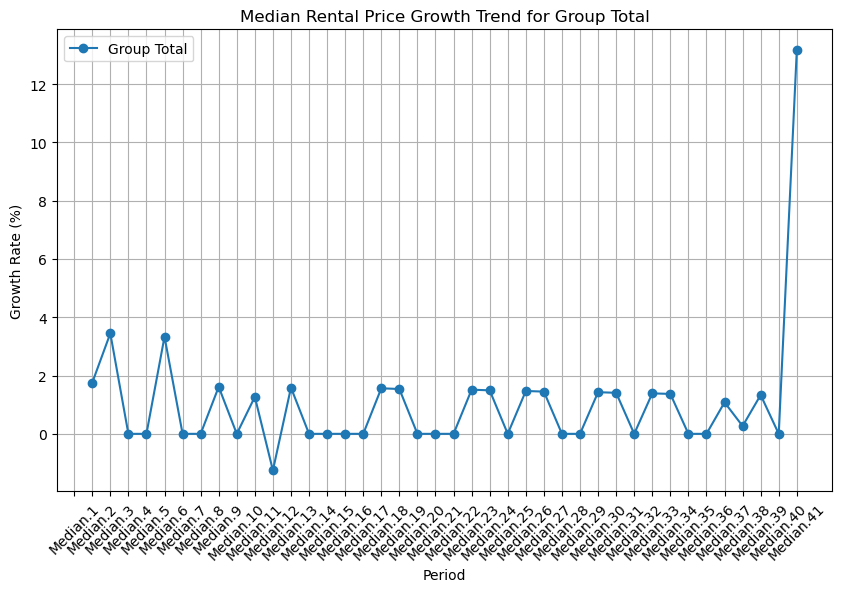

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.538462  3.030303       0.0  2.941176       0.0       0.0   
1      <NA>  3.571429  1.724138  1.694915  3.333333  1.612903  1.587302   
2      <NA>  3.846154       0.0  1.851852  1.818182       0.0       0.0   
3      <NA>       0.0  3.571429  3.448276       0.0       0.0       0.0   
4      <NA>       0.0  3.333333  3.225806       0.0       0.0       0.0   
5      <NA>  1.818182       2.5  1.045296       0.0       0.0       0.0   
6      <NA>  1.785714  1.754386  3.448276       0.0       0.0  1.666667   
7      <NA>       0.0       0.0       0.0       0.0  1.666667  1.639344   
8      <NA>  1.754386  3.448276       0.0       0.0  3.333333       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...        0.0   2.564103        0.0   
1       0.0       0.0     1.5625  ...        0.0        0.0        0.0   


In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0    0.968405
1    1.291265
2    0.897644
3    0.913358
4    0.993082
5    0.854852
6    1.059016
7    0.914131
8    1.055402
Name: Average Growth Rate (%), dtype: Float64


In [8]:
print(df["Suburb"])

0                            Berwick
1                         Cranbourne
2                          Dandenong
3    Dandenong North-Endeavour Hills
4          Narre Warren-Hampton Park
5                         Noble Park
6                           Pakenham
7                         Springvale
8                        Group Total
Name: Suburb, dtype: object
